In [49]:
from stock_bot.TradingSystem import *
from stock_bot.AlpacaDataManager import *
import pandas as pd
from pathlib import Path

In [50]:
data_folder = Path('.\\config')
yaml_file = 'api_keys.yaml'
strategy  = 'trading_system.yaml'
yaml_path = data_folder / yaml_file
strat_file = data_folder / strategy

with open(yaml_path, 'r') as file:
    yaml_config = yaml.safe_load(file)


In [51]:
api_key=yaml_config['api_key_paper']
api_secret=yaml_config['api_secret_paper']
data_fetcher = AlpacaDataFetcher(api_key, api_secret)

# Load your strategy
strategy = Strategy(strat_file)


In [52]:

# Fetch historical data
historical_data = data_fetcher.get_historical_data(
    symbol="ETHUSD",
    timeframe="1m",
    start_date=datetime(2024, 1, 1, tzinfo=pytz.UTC),
    end_date=datetime(2024, 5, 1, tzinfo=pytz.UTC)
)



In [53]:
historical_data.tail(-1)

open       high        low      close  \
symbol  timestamp                                                               
ETH/USD 2024-01-01 00:15:00+00:00  2295.3600  2296.2050  2291.7450  2295.8015   
        2024-01-01 00:26:00+00:00  2294.9850  2294.9850  2287.8785  2289.7350   
        2024-01-01 00:37:00+00:00  2289.9145  2292.9220  2289.9145  2292.1500   
        2024-01-01 00:48:00+00:00  2293.1000  2295.8800  2291.5300  2295.2300   
        2024-01-01 00:59:00+00:00  2294.4000  2294.5000  2292.0630  2294.5000   
...                                      ...        ...        ...        ...   
        2024-03-17 09:13:00+00:00  3560.9000  3568.2700  3553.1110  3555.6730   
        2024-03-17 09:24:00+00:00  3554.2665  3561.1055  3550.0400  3557.3100   
        2024-03-17 09:35:00+00:00  3559.3500  3561.1310  3546.3060  3552.0700   
        2024-03-17 09:46:00+00:00  3550.6465  3554.9300  3540.9440  3549.5095   
        2024-03-17 09:57:00+00:00  3550.7000  3560.1655  3549.7405  3559.1195   

                                     volume  trade_count      vwap  
symbol  timestamp                                                   
ETH/USD 2024-01-01 00:15:00+00:00  0.000000          0.0     0.000  
        2024-01-01 00:26:00+00:00  0.000000          0.0     0.000  
        2024-01-01 00:37:00+00:00  0.000000          0.0     0.000  
        2024-01-01 00:48:00+00:00  0.000438          1.0  2293.100  
        2024-01-01 00:59:00+00:00  0.000000          0.0     0.000  
...                                     ...          ...       ...  
        2024-03-17 09:13:00+00:00  0.434679          1.0  3565.540  
        2024-03-17 09:24:00+00:00  0.000000          0.0     0.000  
        2024-03-17 09:35:00+00:00  0.000282          1.0  3552.181  
        2024-03-17 09:46:00+00:00  0.027411          1.0  3549.839  
        2024-03-17 09:57:00+00:00  0.000000          0.0     0.000  

[9999 rows x 7 columns]

In [54]:
historical_data.droplevel('symbol')

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2024-01-01 00:04:00+00:00,2286.0205,2296.0055,2285.9250,2296.0055,0.439500,1.0,2287.538
2024-01-01 00:15:00+00:00,2295.3600,2296.2050,2291.7450,2295.8015,0.000000,0.0,0.000
2024-01-01 00:26:00+00:00,2294.9850,2294.9850,2287.8785,2289.7350,0.000000,0.0,0.000
2024-01-01 00:37:00+00:00,2289.9145,2292.9220,2289.9145,2292.1500,0.000000,0.0,0.000
2024-01-01 00:48:00+00:00,2293.1000,2295.8800,2291.5300,2295.2300,0.000438,1.0,2293.100
...,...,...,...,...,...,...,...
2024-03-17 09:13:00+00:00,3560.9000,3568.2700,3553.1110,3555.6730,0.434679,1.0,3565.540
2024-03-17 09:24:00+00:00,3554.2665,3561.1055,3550.0400,3557.3100,0.000000,0.0,0.000
2024-03-17 09:35:00+00:00,3559.3500,3561.1310,3546.3060,3552.0700,0.000282,1.0,3552.181


In [55]:
signals = strategy.backtest(historical_data)


In [56]:
signals.history

open       high        low      close  \
symbol  timestamp                                                               
ETH/USD 2024-01-01 00:04:00+00:00  2286.0205  2296.0055  2285.9250  2296.0055   
        2024-01-01 00:15:00+00:00  2295.3600  2296.2050  2291.7450  2295.8015   
        2024-01-01 00:26:00+00:00  2294.9850  2294.9850  2287.8785  2289.7350   
        2024-01-01 00:37:00+00:00  2289.9145  2292.9220  2289.9145  2292.1500   
        2024-01-01 00:48:00+00:00  2293.1000  2295.8800  2291.5300  2295.2300   
...                                      ...        ...        ...        ...   
        2024-03-17 09:13:00+00:00  3560.9000  3568.2700  3553.1110  3555.6730   
        2024-03-17 09:24:00+00:00  3554.2665  3561.1055  3550.0400  3557.3100   
        2024-03-17 09:35:00+00:00  3559.3500  3561.1310  3546.3060  3552.0700   
        2024-03-17 09:46:00+00:00  3550.6465  3554.9300  3540.9440  3549.5095   
        2024-03-17 09:57:00+00:00  3550.7000  3560.1655  3549.7405  3559.1195   

                                     volume  trade_count      vwap  position  \
symbol  timestamp                                                              
ETH/USD 2024-01-01 00:04:00+00:00  0.439500          1.0  2287.538         0   
        2024-01-01 00:15:00+00:00  0.000000          0.0     0.000         0   
        2024-01-01 00:26:00+00:00  0.000000          0.0     0.000         0   
        2024-01-01 00:37:00+00:00  0.000000          0.0     0.000         0   
        2024-01-01 00:48:00+00:00  0.000438          1.0  2293.100         0   
...                                     ...          ...       ...       ...   
        2024-03-17 09:13:00+00:00  0.434679          1.0  3565.540         0   
        2024-03-17 09:24:00+00:00  0.000000          0.0     0.000         0   
        2024-03-17 09:35:00+00:00  0.000282          1.0  3552.181         0   
        2024-03-17 09:46:00+00:00  0.027411          1.0  3549.839         0   
        2024-03-17 09:57:00+00:00  0.000000          0.0     0.000         0   

                                     equity  returns  drawdown signal  
symbol  timestamp                                                      
ETH/USD 2024-01-01 00:04:00+00:00  100000.0      NaN       0.0   None  
        2024-01-01 00:15:00+00:00  100000.0      0.0       0.0   None  
        2024-01-01 00:26:00+00:00  100000.0      0.0       0.0   None  
        2024-01-01 00:37:00+00:00  100000.0      0.0       0.0   None  
        2024-01-01 00:48:00+00:00  100000.0      0.0       0.0   None  
...                                     ...      ...       ...    ...  
        2024-03-17 09:13:00+00:00  100000.0      0.0       0.0   None  
        2024-03-17 09:24:00+00:00  100000.0      0.0       0.0   None  
        2024-03-17 09:35:00+00:00  100000.0      0.0       0.0   None  
        2024-03-17 09:46:00+00:00  100000.0      0.0       0.0   None  
        2024-03-17 09:57:00+00:00  100000.0      0.0       0.0   None  

[10000 rows x 12 columns]

In [57]:
signals.signals

[]

In [58]:
signals

BacktestResult(signals=[], metrics={'total_trades': 0, 'profit_factor': 0, 'win_rate': 0, 'max_drawdown': 0, 'sharpe_ratio': 0, 'total_return': 0}, history=                                        open       high        low      close  \
symbol  timestamp                                                               
ETH/USD 2024-01-01 00:04:00+00:00  2286.0205  2296.0055  2285.9250  2296.0055   
        2024-01-01 00:15:00+00:00  2295.3600  2296.2050  2291.7450  2295.8015   
        2024-01-01 00:26:00+00:00  2294.9850  2294.9850  2287.8785  2289.7350   
        2024-01-01 00:37:00+00:00  2289.9145  2292.9220  2289.9145  2292.1500   
        2024-01-01 00:48:00+00:00  2293.1000  2295.8800  2291.5300  2295.2300   
...                                      ...        ...        ...        ...   
        2024-03-17 09:13:00+00:00  3560.9000  3568.2700  3553.1110  3555.6730   
        2024-03-17 09:24:00+00:00  3554.2665  3561.1055  3550.0400  3557.3100   
        2024-03-17 09:35:00+00:00 

In [59]:
strategy.config

{'symbol': 'BTCUSDT',
 'timeframe': '1h',
 'mode': 'backtest',
 'risk_management': {'position_sizing_method': 'atr_based',
  'risk_per_trade': 0.02,
  'max_position_size': 1.0,
  'stop_loss': 0.02,
  'take_profit': 0.04,
  'max_drawdown': 0.15,
  'atr_multiplier': 2.0},
 'entry_conditions': [{'indicator': 'MACD',
   'params': {'fast_period': 12, 'slow_period': 26, 'signal_period': 9},
   'comparison': 'crosses_above',
   'threshold': 0},
  {'indicator': 'Bollinger',
   'params': {'window': 20, 'std_dev': 2},
   'comparison': 'crosses_below',
   'threshold': 'lower'}],
 'exit_conditions': [{'indicator': 'ATR',
   'params': {'window': 14},
   'comparison': 'above',
   'threshold': 25},
  {'indicator': 'RSI',
   'params': {'window': 14},
   'comparison': 'crosses_above',
   'threshold': 70}]}

In [60]:
# Get account balance
account_balance = data_fetcher.get_account_balance()

# Run backtest
signals = strategy.backtest(historical_data, account_balance)



In [61]:
# Get account balance
account_balance = data_fetcher.get_account_balance()

# Run backtest
signals = strategy.backtest(historical_data, account_balance)



In [62]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna

'''# Load datas
df = pd.read_csv('ta/tests/data/datas.csv', sep=',')

# Clean NaN values
df = dropna(df)
'''
# Add ta features filling NaN values
df = add_all_ta_features(
    historical_data, open="open", high="high", low="low", close="close", volume="volume", fillna=True)

c:\Users\fwmac\anaconda3\envs\alpaca\Lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


In [63]:
df

open       high        low      close  \
symbol  timestamp                                                               
ETH/USD 2024-01-01 00:04:00+00:00  2286.0205  2296.0055  2285.9250  2296.0055   
        2024-01-01 00:15:00+00:00  2295.3600  2296.2050  2291.7450  2295.8015   
        2024-01-01 00:26:00+00:00  2294.9850  2294.9850  2287.8785  2289.7350   
        2024-01-01 00:37:00+00:00  2289.9145  2292.9220  2289.9145  2292.1500   
        2024-01-01 00:48:00+00:00  2293.1000  2295.8800  2291.5300  2295.2300   
...                                      ...        ...        ...        ...   
        2024-03-17 09:13:00+00:00  3560.9000  3568.2700  3553.1110  3555.6730   
        2024-03-17 09:24:00+00:00  3554.2665  3561.1055  3550.0400  3557.3100   
        2024-03-17 09:35:00+00:00  3559.3500  3561.1310  3546.3060  3552.0700   
        2024-03-17 09:46:00+00:00  3550.6465  3554.9300  3540.9440  3549.5095   
        2024-03-17 09:57:00+00:00  3550.7000  3560.1655  3549.7405  3559.1195   

                                     volume  trade_count      vwap  \
symbol  timestamp                                                    
ETH/USD 2024-01-01 00:04:00+00:00  0.439500          1.0  2287.538   
        2024-01-01 00:15:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:26:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:37:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:48:00+00:00  0.000438          1.0  2293.100   
...                                     ...          ...       ...   
        2024-03-17 09:13:00+00:00  0.434679          1.0  3565.540   
        2024-03-17 09:24:00+00:00  0.000000          0.0     0.000   
        2024-03-17 09:35:00+00:00  0.000282          1.0  3552.181   
        2024-03-17 09:46:00+00:00  0.027411          1.0  3549.839   
        2024-03-17 09:57:00+00:00  0.000000          0.0     0.000   

                                   volume_adi  volume_obv  volume_cmf  ...  \
symbol  timestamp                                                      ...   
ETH/USD 2024-01-01 00:04:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:15:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:26:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:37:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:48:00+00:00    0.439807    0.439938    0.999702  ...   
...                                       ...         ...         ...  ...   
        2024-03-17 09:13:00+00:00   11.955263   85.455515   -0.447802  ...   
        2024-03-17 09:24:00+00:00   11.955263   85.455515   -0.447794  ...   
        2024-03-17 09:35:00+00:00   11.955200   85.455232   -0.447791  ...   
        2024-03-17 09:46:00+00:00   11.961364   85.427821   -0.446779  ...   
        2024-03-17 09:57:00+00:00   11.961364   85.427821   -0.446779  ...   

                                   momentum_ppo  momentum_ppo_signal  \
symbol  timestamp                                                      
ETH/USD 2024-01-01 00:04:00+00:00      0.000000             0.000000   
        2024-01-01 00:15:00+00:00     -0.000709            -0.000142   
        2024-01-01 00:26:00+00:00     -0.022338            -0.004581   
        2024-01-01 00:37:00+00:00     -0.030640            -0.009793   
        2024-01-01 00:48:00+00:00     -0.026089            -0.013052   
...                                         ...                  ...   
        2024-03-17 09:13:00+00:00      0.055857            -0.306679   
        2024-03-17 09:24:00+00:00      0.138937            -0.217556   
        2024-03-17 09:35:00+00:00      0.190477            -0.135949   
        2024-03-17 09:46:00+00:00      0.222834            -0.064193   
        2024-03-17 09:57:00+00:00      0.267288             0.002103   

                                   momentum_ppo_hist  momentum_pvo  \
symbol  timestamp                                    

In [64]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv

In [65]:
strategy.config

{'symbol': 'BTCUSDT',
 'timeframe': '1h',
 'mode': 'backtest',
 'risk_management': {'position_sizing_method': 'atr_based',
  'risk_per_trade': 0.02,
  'max_position_size': 1.0,
  'stop_loss': 0.02,
  'take_profit': 0.04,
  'max_drawdown': 0.15,
  'atr_multiplier': 2.0},
 'entry_conditions': [{'indicator': 'MACD',
   'params': {'fast_period': 12, 'slow_period': 26, 'signal_period': 9},
   'comparison': 'crosses_above',
   'threshold': 0},
  {'indicator': 'Bollinger',
   'params': {'window': 20, 'std_dev': 2},
   'comparison': 'crosses_below',
   'threshold': 'lower'}],
 'exit_conditions': [{'indicator': 'ATR',
   'params': {'window': 14},
   'comparison': 'above',
   'threshold': 25},
  {'indicator': 'RSI',
   'params': {'window': 14},
   'comparison': 'crosses_above',
   'threshold': 70}]}

In [66]:
df.momentum_rsi.describe()

count    10000.000000
mean        51.388980
std         11.290334
min          0.000000
25%         44.008922
50%         51.444352
75%         58.748476
max        100.000000
Name: momentum_rsi, dtype: float64

In [67]:
df.trend_macd.describe()

count    10000.000000
mean         0.856393
std          9.048626
min        -80.683360
25%         -2.687303
50%          0.655730
75%          4.391233
max         60.564864
Name: trend_macd, dtype: float64

In [68]:
df.trend_macd_diff.describe()

count    10000.000000
mean         0.000037
std          2.806466
min        -22.027409
25%         -1.162918
50%         -0.030142
75%          1.178995
max         22.748741
Name: trend_macd_diff, dtype: float64

In [69]:
df.trend_macd_signal.describe()

count    10000.000000
mean         0.856356
std          8.487189
min        -69.147906
25%         -2.551513
50%          0.580020
75%          4.287457
max         53.791841
Name: trend_macd_signal, dtype: float64

In [70]:
import pandas_ta as ta

# Create your own Custom Strategy
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 50},
        {"kind": "sma", "length": 200},
        {"kind": "bbands", "length": 20},
        {"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
        {"kind": "sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    ]
)
# To run your "Custom Strategy"
df.ta.strategy(CustomStrategy)

In [71]:
np.__version__

'2.1.3'

In [72]:
import ta

In [73]:
import talib

In [74]:
import numpy
import talib

close = numpy.random.random(100)

In [75]:
from talib import MA_Type

upper, middle, lower = talib.BBANDS(close, matype=MA_Type.T3)

In [76]:
output = talib.MOM(close, timeperiod=5)

In [77]:
df

open       high        low      close  \
symbol  timestamp                                                               
ETH/USD 2024-01-01 00:04:00+00:00  2286.0205  2296.0055  2285.9250  2296.0055   
        2024-01-01 00:15:00+00:00  2295.3600  2296.2050  2291.7450  2295.8015   
        2024-01-01 00:26:00+00:00  2294.9850  2294.9850  2287.8785  2289.7350   
        2024-01-01 00:37:00+00:00  2289.9145  2292.9220  2289.9145  2292.1500   
        2024-01-01 00:48:00+00:00  2293.1000  2295.8800  2291.5300  2295.2300   
...                                      ...        ...        ...        ...   
        2024-03-17 09:13:00+00:00  3560.9000  3568.2700  3553.1110  3555.6730   
        2024-03-17 09:24:00+00:00  3554.2665  3561.1055  3550.0400  3557.3100   
        2024-03-17 09:35:00+00:00  3559.3500  3561.1310  3546.3060  3552.0700   
        2024-03-17 09:46:00+00:00  3550.6465  3554.9300  3540.9440  3549.5095   
        2024-03-17 09:57:00+00:00  3550.7000  3560.1655  3549.7405  3559.1195   

                                     volume  trade_count      vwap  \
symbol  timestamp                                                    
ETH/USD 2024-01-01 00:04:00+00:00  0.439500          1.0  2287.538   
        2024-01-01 00:15:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:26:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:37:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:48:00+00:00  0.000438          1.0  2293.100   
...                                     ...          ...       ...   
        2024-03-17 09:13:00+00:00  0.434679          1.0  3565.540   
        2024-03-17 09:24:00+00:00  0.000000          0.0     0.000   
        2024-03-17 09:35:00+00:00  0.000282          1.0  3552.181   
        2024-03-17 09:46:00+00:00  0.027411          1.0  3549.839   
        2024-03-17 09:57:00+00:00  0.000000          0.0     0.000   

                                   volume_adi  volume_obv  volume_cmf  ...  \
symbol  timestamp                                                      ...   
ETH/USD 2024-01-01 00:04:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:15:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:26:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:37:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:48:00+00:00    0.439807    0.439938    0.999702  ...   
...                                       ...         ...         ...  ...   
        2024-03-17 09:13:00+00:00   11.955263   85.455515   -0.447802  ...   
        2024-03-17 09:24:00+00:00   11.955263   85.455515   -0.447794  ...   
        2024-03-17 09:35:00+00:00   11.955200   85.455232   -0.447791  ...   
        2024-03-17 09:46:00+00:00   11.961364   85.427821   -0.446779  ...   
        2024-03-17 09:57:00+00:00   11.961364   85.427821   -0.446779  ...   

                                    BBL_20_2.0   BBM_20_2.0   BBU_20_2.0  \
symbol  timestamp                                                          
ETH/USD 2024-01-01 00:04:00+00:00          NaN          NaN          NaN   
        2024-01-01 00:15:00+00:00          NaN          NaN          NaN   
        2024-01-01 00:26:00+00:00          NaN          NaN          NaN   
        2024-01-01 00:37:00+00:00          NaN          NaN          NaN   
        2024-01-01 00:48:00+00:00          NaN          NaN          NaN   
...                                        ...          ...          ...   
        2024-03-17 09:13:00+00:00  3414.669896  3498.675900  3582.681904   
        2024-03-17 09:24:00+00:00  3413.458656  3499.611275  3585.763894   
        2024-03-17 09:35:00+00:00  3412.882170  3500.097775  3587.313380   
        2024-03-17 09:46:00+00:00  3412.093358  3501.193250  3590.293142   
        2024-03-17 09:57:00+00:00  3410.807931  3503.079200  3595.350469   

                                   BBB_20_2.0  BBP_20_2.0     RSI_14  \

In [78]:
for col in df.columns:
    print(col)

open
high
low
close
volume
trade_count
vwap
volume_adi
volume_obv
volume_cmf
volume_fi
volume_em
volume_sma_em
volume_vpt
volume_vwap
volume_mfi
volume_nvi
volatility_bbm
volatility_bbh
volatility_bbl
volatility_bbw
volatility_bbp
volatility_bbhi
volatility_bbli
volatility_kcc
volatility_kch
volatility_kcl
volatility_kcw
volatility_kcp
volatility_kchi
volatility_kcli
volatility_dcl
volatility_dch
volatility_dcm
volatility_dcw
volatility_dcp
volatility_atr
volatility_ui
trend_macd
trend_macd_signal
trend_macd_diff
trend_sma_fast
trend_sma_slow
trend_ema_fast
trend_ema_slow
trend_vortex_ind_pos
trend_vortex_ind_neg
trend_vortex_ind_diff
trend_trix
trend_mass_index
trend_dpo
trend_kst
trend_kst_sig
trend_kst_diff
trend_ichimoku_conv
trend_ichimoku_base
trend_ichimoku_a
trend_ichimoku_b
trend_stc
trend_adx
trend_adx_pos
trend_adx_neg
trend_cci
trend_visual_ichimoku_a
trend_visual_ichimoku_b
trend_aroon_up
trend_aroon_down
trend_aroon_ind
trend_psar_up
trend_psar_down
trend_psar_up_indicato

In [79]:
from talib import abstract
sma = abstract.Function('sma')


In [80]:
df['sma'] = sma(df.close)

In [81]:
upperband, middleband, lowerband = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)


In [82]:
lowerband

symbol   timestamp                
ETH/USD  2024-01-01 00:04:00+00:00            NaN
         2024-01-01 00:15:00+00:00            NaN
         2024-01-01 00:26:00+00:00            NaN
         2024-01-01 00:37:00+00:00            NaN
         2024-01-01 00:48:00+00:00            NaN
                                         ...     
         2024-03-17 09:13:00+00:00    3414.669896
         2024-03-17 09:24:00+00:00    3413.458656
         2024-03-17 09:35:00+00:00    3412.882170
         2024-03-17 09:46:00+00:00    3412.093358
         2024-03-17 09:57:00+00:00    3410.807931
Length: 10000, dtype: float64

In [83]:
macd, macdsignal, macdhist = talib.MACD(df.close, fastperiod=12, slowperiod=26, signalperiod=9)


In [84]:
macd

symbol   timestamp                
ETH/USD  2024-01-01 00:04:00+00:00         NaN
         2024-01-01 00:15:00+00:00         NaN
         2024-01-01 00:26:00+00:00         NaN
         2024-01-01 00:37:00+00:00         NaN
         2024-01-01 00:48:00+00:00         NaN
                                        ...   
         2024-03-17 09:13:00+00:00    1.964401
         2024-03-17 09:24:00+00:00    4.890362
         2024-03-17 09:35:00+00:00    6.709046
         2024-03-17 09:46:00+00:00    7.853228
         2024-03-17 09:57:00+00:00    9.426780
Length: 10000, dtype: float64

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


def plot_macd(dates, prices, macd, signal, histogram):
    # Create figure and axis objects with subplots()
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=[2, 1])
    fig.suptitle('MACD Technical Indicator', fontsize=14)
    
    # Plot price in the first subplot
    ax1.plot(dates, prices, label='Price', color='blue')
    ax1.set_title('Price Chart')
    ax1.grid(True)
    ax1.legend()
    
    # Plot MACD components in the second subplot
    ax2.plot(dates, macd, label='MACD', color='blue')
    ax2.plot(dates, signal, label='Signal Line', color='red')
    
    # Plot histogram
    for i in range(len(dates)):
        if histogram[i] >= 0:
            ax2.bar(dates[i], histogram[i], color='green', width=15)
        else:
            ax2.bar(dates[i], histogram[i], color='red', width=15)
    
    ax2.set_title('MACD')
    ax2.grid(True)
    ax2.legend()
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [86]:
df = df.droplevel('symbol')

C:\Users\fwmac\AppData\Local\Temp\ipykernel_27292\4159434043.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if histogram[i] >= 0:
C:\Users\fwmac\AppData\Local\Temp\ipykernel_27292\4159434043.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.bar(dates[i], histogram[i], color='green', width=15)
C:\Users\fwmac\AppData\Local\Temp\ipykernel_27292\4159434043.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.bar(dates[i

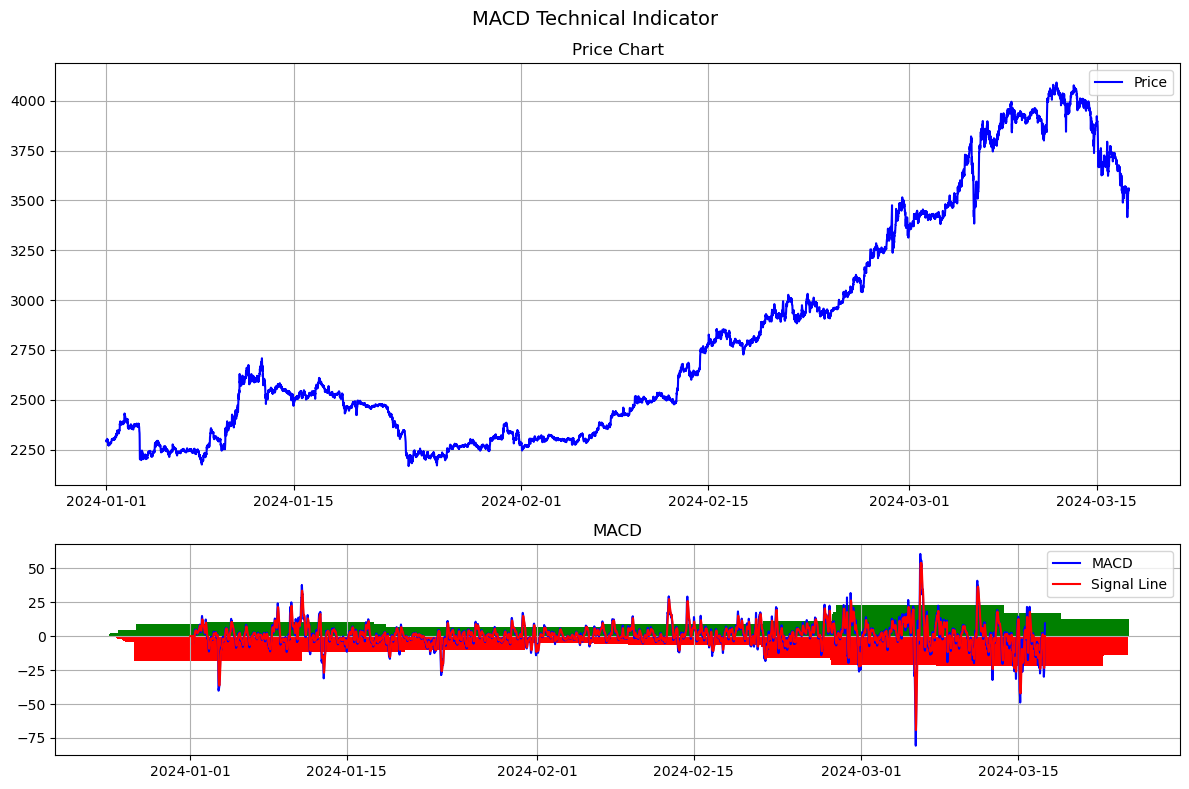

In [87]:
plot_macd(df.index, df.close, macd, macdsignal.fillna(0), macdhist.fillna(0))

In [88]:
df['macd'] = macd

In [89]:
df.macd

timestamp
2024-01-01 00:04:00+00:00   NaN
2024-01-01 00:15:00+00:00   NaN
2024-01-01 00:26:00+00:00   NaN
2024-01-01 00:37:00+00:00   NaN
2024-01-01 00:48:00+00:00   NaN
                             ..
2024-03-17 09:13:00+00:00   NaN
2024-03-17 09:24:00+00:00   NaN
2024-03-17 09:35:00+00:00   NaN
2024-03-17 09:46:00+00:00   NaN
2024-03-17 09:57:00+00:00   NaN
Name: macd, Length: 10000, dtype: float64

<Axes: xlabel='timestamp'>

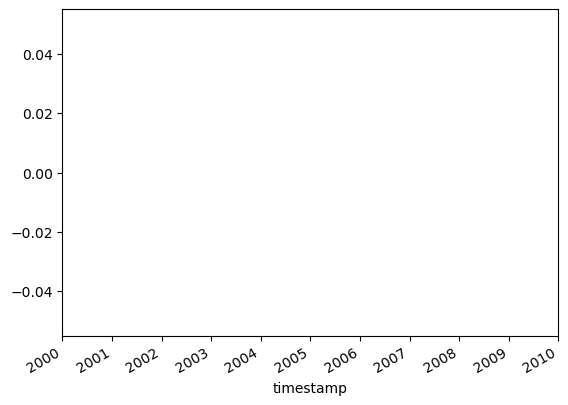

In [90]:
df.macd.plot()

In [91]:
df['macdsignal'] = macdsignal
df['macdhist'] = macdhist



In [92]:
df['bollinger_upper'], df['bollinger_middle'], df['bollinger_lower'] = talib.BBANDS(df.close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)


In [93]:
df['atr'] = talib.ATR(df.high, df.low, df.close, timeperiod=14)

df.atr.describe()


count    9986.000000
mean        9.900662
std         7.870853
min         1.601945
25%         5.314619
50%         7.939466
75%        11.586455
max        99.928248
Name: atr, dtype: float64

In [ ]:
df.atr.plot()

In [ ]:
cash = 100000.00
position_value = 0
risk_per_trade = 0.10
num_shares = 0 
df['signal'] = ''
for idx, row in df.iterrows():
    if (row['macdsignal'] > row['macd']) & (row['bollinger_lower'] < row['close']):
        row['signal'] = 'buy_signal'

        row['']

        

In [ ]:
from codecs import utf_16_be_decode
from dataclasses import dataclass
from typing import List, Dict, Optional
import pandas as pd
import numpy as np
from datetime import datetime

@dataclass
class BacktestResult:
    """Container for backtest results"""
    trades: pd.DataFrame
    metrics: Dict[str, float]
    equity_curve: pd.Series
    positions: pd.Series
    signals: pd.Series

class DataFrameBacktester:
    def __init__(self, config_path: str):
        with open(config_path, 'r') as f:
            self.config = yaml.safe_load(f)
            print(self.config)
        
        # Store configuration
        self.symbol = self.config['symbol']
        self.risk_config = self.config['risk_management']
        
        # Initialize state
        self.position = False
        self.entry_price = 0
        self.position_size = 0

    def _check_entry_conditions(self, row: pd.Series) -> bool:
        """Check if entry conditions are met"""
        conditions = []
        
        # MACD condition
        if 'macd' in row and 'macd_signal' in row:
            macd_cross = (row['macd'] > row['macd_signal']) & (row['macd_prev'] <= row['macd_signal_prev'])
            conditions.append(macd_cross)
        
        # Bollinger condition
        if 'bb_lower' in row:
            price_cross_lower = (row['close'] < row['bb_lower']) & (row['close_prev'] >= row['bb_lower_prev'])
            conditions.append(price_cross_lower)
        
        return all(conditions)

    def _check_exit_conditions(self, row: pd.Series) -> bool:
        """Check if exit conditions are met"""
        conditions = []
        
        # ATR condition
        if 'atr' in row:
            atr_condition = row['atr'] > 25
            conditions.append(atr_condition)
        
        # RSI condition
        if 'rsi' in row and 'rsi_prev' in row:
            rsi_cross = (row['rsi'] > 70) & (row['rsi_prev'] <= 70)
            conditions.append(rsi_cross)
        
        return any(conditions)

    def _calculate_position_size(self, row: pd.Series, account_balance: float) -> float:
        """Calculate position size based on risk management rules"""
        if self.risk_config['position_sizing_method'] == 'atr_based':
            risk_amount = account_balance * self.risk_config['risk_per_trade']
            stop_distance = row['atr'] * self.risk_config['atr_multiplier']
            position_size = risk_amount / stop_distance
            return min(position_size, self.risk_config['max_position_size'])
        return self.risk_config['max_position_size']

    def _check_stop_loss(self, row: pd.Series) -> bool:
        """Check if stop loss is hit"""
        if not self.position:
            return False
        return row['close'] <= self.entry_price * (1 - self.risk_config['stop_loss'])

    def _check_take_profit(self, row: pd.Series) -> bool:
        """Check if take profit is hit"""
        if not self.position:
            return False
        return row['close'] >= self.entry_price * (1 + self.risk_config['take_profit'])

    def backtest(self, df: pd.DataFrame, initial_balance: float = 100000.0) -> BacktestResult:
        """
        Run backtest on DataFrame with pre-calculated indicators
        
        Parameters:
        - df: DataFrame with OHLCV data and indicators
        - initial_balance: Starting account balance
        
        Returns:
        - BacktestResult object with trades, metrics, and equity curve
        """
        # Create copies of data for manipulation
        data = df.copy()
        
        # Add previous values for crossover calculations
        for col in ['close', 'macd', 'macd_signal', 'bb_lower', 'rsi']:
            if col in data.columns:
                data[f'{col}_prev'] = data[col].shift(1)
        
        # Initialize results tracking
        trades_list = []
        balance = initial_balance
        equity = [initial_balance]
        positions = pd.Series(0, index=data.index)
        signals = pd.Series(None, index=data.index)
        
        # Run backtest
        for idx, row in data.iterrows():
            current_equity = balance
            
            # Check for exits if in position
            if self.position:
                # Calculate unrealized P&L
                unrealized_pnl = (row['close'] - self.entry_price) * self.position_size
                current_equity = balance + unrealized_pnl
                positions[idx] = self.position_size
                
                # Check stop loss
                if self._check_stop_loss(row):
                    trade_pnl = (row['close'] - self.entry_price) * self.position_size
                    balance += trade_pnl
                    trades_list.append({
                        'entry_time': self.entry_time,
                        'exit_time': idx,
                        'entry_price': self.entry_price,
                        'exit_price': row['close'],
                        'quantity': self.position_size,
                        'pnl': trade_pnl,
                        'exit_type': 'stop_loss'
                    })
                    signals[idx] = 'stop_loss_exit'
                    self.position = False
                    continue
                
                # Check take profit
                if self._check_take_profit(row):
                    trade_pnl = (row['close'] - self.entry_price) * self.position_size
                    balance += trade_pnl
                    trades_list.append({
                        'entry_time': self.entry_time,
                        'exit_time': idx,
                        'entry_price': self.entry_price,
                        'exit_price': row['close'],
                        'quantity': self.position_size,
                        'pnl': trade_pnl,
                        'exit_type': 'take_profit'
                    })
                    signals[idx] = 'take_profit_exit'
                    self.position = False
                    continue
                
                # Check regular exit conditions
                if self._check_exit_conditions(row):
                    trade_pnl = (row['close'] - self.entry_price) * self.position_size
                    balance += trade_pnl
                    trades_list.append({
                        'entry_time': self.entry_time,
                        'exit_time': idx,
                        'entry_price': self.entry_price,
                        'exit_price': row['close'],
                        'quantity': self.position_size,
                        'pnl': trade_pnl,
                        'exit_type': 'signal'
                    })
                    signals[idx] = 'signal_exit'
                    self.position = False
            
            # Check entry conditions if not in position
            elif self._check_entry_conditions(row):
                self.position_size = self._calculate_position_size(row, balance)
                self.position = True
                self.entry_price = row['close']
                self.entry_time = idx
                positions[idx] = self.position_size
                signals[idx] = 'entry'
            
            equity.append(current_equity)
        
        # Create trades DataFrame
        trades_df = pd.DataFrame(trades_list)
        print(trades_df.shape)
        if len(trades_df) > 0:
            trades_df.set_index('entry_time', inplace=True)

        print(len(equity), 'equity')
        print(len(data.index))
        # Calculate metrics
        metrics = self._calculate_metrics(trades_df, pd.Series(equity, index=data.index), initial_balance)
        
        return BacktestResult(
            trades=trades_df,
            metrics=metrics,
            equity_curve=pd.Series(equity, index=data.index),
            positions=positions,
            signals=signals
        )

    def _calculate_metrics(self, trades: pd.DataFrame, equity: pd.Series, initial_balance: float) -> Dict[str, float]:
        """Calculate backtest performance metrics"""
        if len(trades) == 0:
            return {
                "total_trades": 0,
                "win_rate": 0,
                "profit_factor": 0,
                "total_return": 0,
                "max_drawdown": 0,
                "sharpe_ratio": 0
            }
        
        # Calculate returns and drawdown
        returns = equity.pct_change().dropna()
        drawdown = (equity - equity.cummax()) / equity.cummax()
        
        # Calculate trade metrics
        winning_trades = trades[trades['pnl'] > 0]
        losing_trades = trades[trades['pnl'] <= 0]
        
        metrics = {
            "total_trades": len(trades),
            "winning_trades": len(winning_trades),
            "losing_trades": len(losing_trades),
            "win_rate": len(winning_trades) / len(trades),
            "profit_factor": abs(winning_trades['pnl'].sum() / losing_trades['pnl'].sum()) if len(losing_trades) > 0 else float('inf'),
            "total_return": (equity.iloc[-1] - initial_balance) / initial_balance,
            "max_drawdown": abs(drawdown.min()),
            "sharpe_ratio": np.sqrt(252) * returns.mean() / returns.std() if len(returns) > 0 else 0
        }
        
        return metrics

In [110]:
df

,open,high,low,close,volume,trade_count,vwap,volume_adi,volume_obv,volume_cmf,...,macdhist,bollinger_upper,bollinger_middle,bollinger_lower,atr,macd_signal,bb_mid,bb_upper,bb_lower,rsi
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:04:00+00:00,2286.0205,2296.0055,2285.9250,2296.0055,0.439500,1.0,2287.538,0.439500,0.439500,1.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2024-01-01 00:15:00+00:00,2295.3600,2296.2050,2291.7450,2295.8015,0.000000,0.0,0.000,0.439500,0.439500,1.000000,...,NaN,NaN,NaN,NaN,NaN,-0.002543,NaN,NaN,NaN,NaN
2024-01-01 00:26:00+00:00,2294.9850,2294.9850,2287.8785,2289.7350,0.000000,0.0,0.000,0.439500,0.439500,1.000000,...,NaN,NaN,NaN,NaN,NaN,-0.080990,NaN,NaN,NaN,NaN
2024-01-01 00:37:00+00:00,2289.9145,2292.9220,2289.9145,2292.1500,0.000000,0.0,0.000,0.439500,0.439500,1.000000,...,NaN,NaN,NaN,NaN,NaN,-0.117287,NaN,NaN,NaN,NaN
2024-01-01 00:48:00+00:00,2293.1000,2295.8800,2291.5300,2295.2300,0.000438,1.0,2293.100,0.439807,0.439938,0.999702,...,NaN,NaN,NaN,NaN,NaN,-0.099787,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-17 09:13:00+00:00,3560.9000,3568.2700,3553.1110,3555.6730,0.434679,1.0,3565.540,11.955263,85.455515,-0.447802,...,NaN,3582.681904,3498.675900,3414.669896,27.347179,-10.762354,3498.675900,3584.864241,3412.487559,64.740233
2024-03-17 09:24:00+00:00,3554.2665,3561.1055,3550.0400,3557.3100,0.000000,0.0,0.000,11.955263,85.455515,-0.447794,...,NaN,3585.763894,3499.611275,3413.458656,24.432679,-7.631811,3499.611275,3588.001997,3411.220553,75.908805
2024-03-17 09:35:00+00:00,3559.3500,3561.1310,3546.3060,3552.0700,0.000282,1.0,3552.181,11.955200,85.455232,-0.447791,...,NaN,3587.313380,3500.097775,3412.882170,24.243750,-4.763640,3500.097775,3589.579098,3410.616452,74.761878


In [111]:
# First, prepare your OHLCV DataFrame with indicators
def prepare_data(df: pd.DataFrame) -> pd.DataFrame:
    # Calculate MACD
    fast = df['close'].ewm(span=12).mean()
    slow = df['close'].ewm(span=26).mean()
    df['macd'] = fast - slow
    df['macd_signal'] = df['macd'].ewm(span=9).mean()
    
    # Calculate Bollinger Bands
    df['bb_mid'] = df['close'].rolling(window=20).mean()
    bb_std = df['close'].rolling(window=20).std()
    df['bb_upper'] = df['bb_mid'] + 2 * bb_std
    df['bb_lower'] = df['bb_mid'] - 2 * bb_std
    
    # Calculate ATR
    high_low = df['high'] - df['low']
    high_close = abs(df['high'] - df['close'].shift())
    low_close = abs(df['low'] - df['close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    df['atr'] = ranges.max(axis=1).rolling(window=14).mean()
    
    # Calculate RSI
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['rsi'] = 100 - (100 / (1 + rs))
    
    return df

# Initialize and run backtest
backtester = DataFrameBacktester(strat_file)

# Prepare your data
#df = prepare_data(df)

# Run backtest
results = backtester.backtest(df, initial_balance=100000)

# Print results
print("\nBacktest Metrics:")
for metric, value in results.metrics.items():
    if isinstance(value, float):
        print(f"{metric}: {value:.2%}" if "rate" in metric or "return" in metric else f"{metric}: {value:.2f}")
    else:
        print(f"{metric}: {value}")

# Look at trades
print("\nTrades:")
print(results.trades)

# Create analysis DataFrame
analysis_df = df.copy()
analysis_df['Position'] = results.positions
analysis_df['Signal'] = results.signals
analysis_df['Equity'] = results.equity_curve

print("\nStrategy Analysis:")
print(analysis_df.tail())

{'symbol': 'BTCUSDT', 'timeframe': '1h', 'mode': 'backtest', 'risk_management': {'position_sizing_method': 'atr_based', 'risk_per_trade': 0.02, 'max_position_size': 1.0, 'stop_loss': 0.02, 'take_profit': 0.04, 'max_drawdown': 0.15, 'atr_multiplier': 2.0}, 'entry_conditions': [{'indicator': 'MACD', 'params': {'fast_period': 12, 'slow_period': 26, 'signal_period': 9}, 'comparison': 'crosses_above', 'threshold': 0}, {'indicator': 'Bollinger', 'params': {'window': 20, 'std_dev': 2}, 'comparison': 'crosses_below', 'threshold': 'lower'}], 'exit_conditions': [{'indicator': 'ATR', 'params': {'window': 14}, 'comparison': 'above', 'threshold': 25}, {'indicator': 'RSI', 'params': {'window': 14}, 'comparison': 'crosses_above', 'threshold': 70}]}
(0, 0)


ValueError: Length of values (10001) does not match length of index (10000)

In [112]:
df.iloc[:-1]

,open,high,low,close,volume,trade_count,vwap,volume_adi,volume_obv,volume_cmf,...,macdhist,bollinger_upper,bollinger_middle,bollinger_lower,atr,macd_signal,bb_mid,bb_upper,bb_lower,rsi
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:04:00+00:00,2286.0205,2296.0055,2285.9250,2296.0055,0.439500,1.0,2287.538,0.439500,0.439500,1.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2024-01-01 00:15:00+00:00,2295.3600,2296.2050,2291.7450,2295.8015,0.000000,0.0,0.000,0.439500,0.439500,1.000000,...,NaN,NaN,NaN,NaN,NaN,-0.002543,NaN,NaN,NaN,NaN
2024-01-01 00:26:00+00:00,2294.9850,2294.9850,2287.8785,2289.7350,0.000000,0.0,0.000,0.439500,0.439500,1.000000,...,NaN,NaN,NaN,NaN,NaN,-0.080990,NaN,NaN,NaN,NaN
2024-01-01 00:37:00+00:00,2289.9145,2292.9220,2289.9145,2292.1500,0.000000,0.0,0.000,0.439500,0.439500,1.000000,...,NaN,NaN,NaN,NaN,NaN,-0.117287,NaN,NaN,NaN,NaN
2024-01-01 00:48:00+00:00,2293.1000,2295.8800,2291.5300,2295.2300,0.000438,1.0,2293.100,0.439807,0.439938,0.999702,...,NaN,NaN,NaN,NaN,NaN,-0.099787,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-17 09:02:00+00:00,3546.5700,3559.0340,3543.5275,3559.0340,0.002194,1.0,3548.260,12.243013,85.890194,-0.442569,...,NaN,3580.645732,3498.089075,3415.532418,27.896821,-13.944043,3498.089075,3582.790418,3413.387732,62.270246
2024-03-17 09:13:00+00:00,3560.9000,3568.2700,3553.1110,3555.6730,0.434679,1.0,3565.540,11.955263,85.455515,-0.447802,...,NaN,3582.681904,3498.675900,3414.669896,27.347179,-10.762354,3498.675900,3584.864241,3412.487559,64.740233
2024-03-17 09:24:00+00:00,3554.2665,3561.1055,3550.0400,3557.3100,0.000000,0.0,0.000,11.955263,85.455515,-0.447794,...,NaN,3585.763894,3499.611275,3413.458656,24.432679,-7.631811,3499.611275,3588.001997,3411.220553,75.908805
